In [13]:
import pandas as pd

df = pd.read_csv('DataFrame.csv')

df

,Unnamed: 0,income_type,children,days_employed,dob_years,education_id,family_status_id,gender,debt,total_income,purpose,total_income_category,purpose_category
0,0,компаньон,0,191.146746,64,0,1,F,0,186408,свадьба,C,проведение свадьбы
1,1,компаньон,0,563.937028,33,1,0,M,0,161976,на покупку своего автомобиля,C,операции с автомобилем
2,2,компаньон,2,1653.272540,25,0,0,F,0,102955,автомобиль,C,операции с автомобилем
3,3,сотрудник,1,2194.220567,33,1,0,F,0,142594,покупка жилья,C,операции с недвижимостью
4,4,сотрудник,0,253.806355,23,1,1,M,0,64992,на проведение свадьбы,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,21449,компаньон,0,3150.622828,46,1,2,F,0,123090,недвижимость,C,операции с недвижимостью
21450,21450,компаньон,0,3596.155013,33,0,0,M,0,168698,получение дополнительного образования,C,получение образования
21451,21451,пенсионер,0,392388.182360,59,0,0,M,1,226496,образование,B,получение образования
21452,21452,компаньон,2,1384.029879,36,1,0,M,0,221043,строительство собственной недвижимости,B,операции с недвижимостью


Деление данных и обучение модели 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Преобразуем категориальные переменные в числовые
label_encoders = {}
for column in ['income_type', 'gender', 'total_income_category', 'purpose_category']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

x = df[['income_type', 'children', 'days_employed', 'dob_years', 'education_id',
          'family_status_id', 'gender', 'purpose_category', 'total_income', 'total_income_category']]
y = df['debt']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Деление данных на тестовые и обучающие выборки
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


Логистическая регрессия

In [15]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of Logistic Regression: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of Logistic Regression: 0.92


Случайный лес

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest: {round(accuracy_rf, 2)}')

Accuracy of Random Forest: 0.92


C:\Users\user\AppData\Local\Temp\ipykernel_4464\143815718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['debt'] = y.loc[:, 'debt']


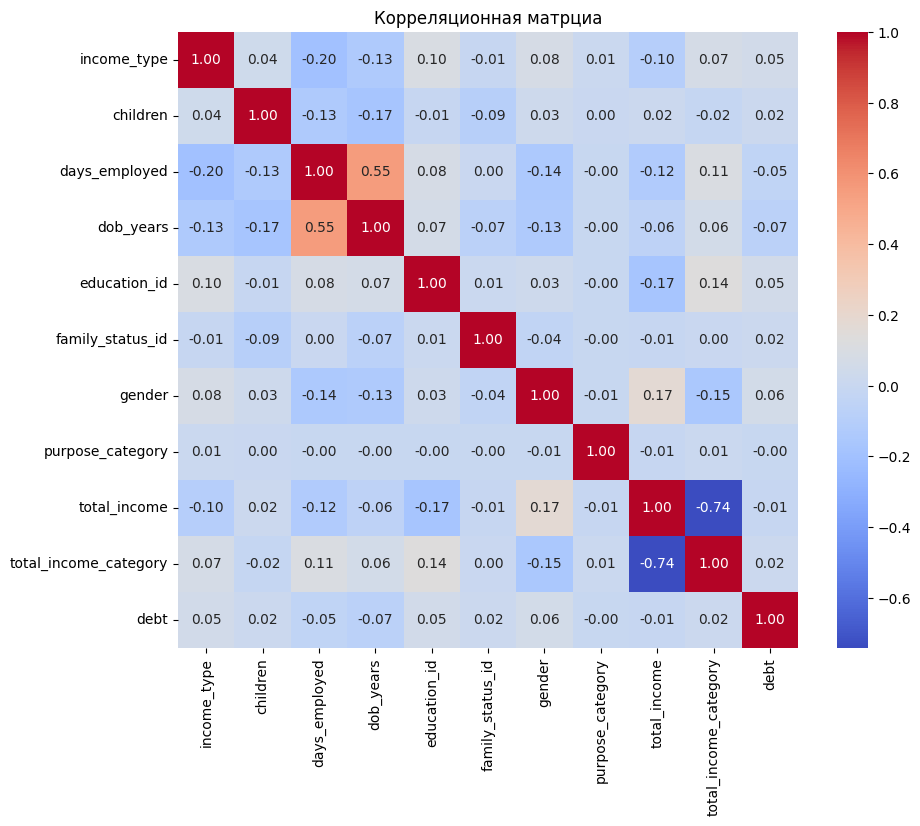

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

y = pd.DataFrame(y)
x['debt'] = y.loc[:, 'debt']
corr_matrix = x.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрциа')
plt.show()